# Names in Freiburg 

In [1]:
import pandas as pd
%matplotlib inline

from IPython.display import Image

pd.options.display.max_rows = 999
pd.options.display.max_colwidth = 1000

[Open Data Portal Freiburg](https://fritz.freiburg.de:8443/Informationsportal/configurator?scenario=OpenData) 

- Search for 'Vornamen' 
- I downloaded the filed and saved it to /data

You should have your myvenv running and start the jupyter notebook 'o4_names'. 

You run the cells by pressing 'SHIFT' and 'ENTER' at the same time. (Hold 'SHIFT' and press 'ENTER' multiple times if you want to run more cells quickly.)

You can allways make your own cells, write and test your own code by pressing: 
- 'ESC' + 'A' > Make a cell before the cell you're in 
- 'ESC' + 'B' > Make a cell below the cell you're in 

## Reading data

In [ ]:
# make a data frame from csv 
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv')

Uups? What happend? 
As a standard 'utf-8' is used as encoding (Translation of special characters like 'ä,ö,ü'). In a lot of open data files other encodings are used. In this case you have to set encoding to 'iso-8859-1'  

In [5]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1')

In [ ]:
df.head()

Still the DataFrame does not look nice. Even if it is a 'comma seperated value' (.csv) file, in this case it has a different seperator.  

In [7]:
df = pd.read_csv('data/de-bw-freiburg-vornamen_nach_jahr_geschlecht_und_alter_-_zeitreihe.csv', 
                  encoding='iso-8859-1', sep=';')

## Exploring data

In [ ]:
# DataFrames often contain thousand of rows. To display them can be time consuming. To have a quick first look at
# the data, we can use head(). As a default it shows the first five rows. head(100) would show 100 rows.  
df.head()

In [ ]:
# Can you guess, what df.tail() does?
df.tail()

In [ ]:
# How many rows has the DataFrame?
len(df)

In [ ]:
# How many rows and columns has the DataFrame?
df.shape

In [ ]:
# To show some information about the data 
df.info()

In [ ]:
# To see how your numeral data is distributed you can use df.describe() 
df.describe()

### YOU DO IT 

There is a name in an age groupe that is shared by 974 People. 

What name is ist?
Just look again at the first rows of the names df. 

### Sorting

In [ ]:
# If you want to change the order 
df.sort_values(by='Anzahl Personen').head()

In [ ]:
# As a default sort_values(by='') gives a ascending order. To change that use 'ascending=False'.
df.sort_values(by='Hilfsmerkmal: Anzahl Name insgesamt', ascending=False).head()

### YOU DO IT 

In [ ]:
# Sort the df by Name 


### Filtering 

In [ ]:
# If you want to reduce complexity, you can filter for special values
# To filter just for female names: 

weiblich = df[df['Geschlecht'] == 'weiblich']

In [ ]:
len(weiblich)

In [ ]:
weiblich_erster = weiblich[weiblich['Rang des Vornamen'] == '1.Vorname']

In [ ]:
len(weiblich_erster)

In [ ]:
## Of course you can filter numeral values, too 
weiblich_erster[weiblich_erster['Anzahl Personen'] > 400]

In [ ]:
# If you want to see how many age groups, you can count for values  
weiblich_erster.Altersgruppe.value_counts()

In [ ]:
weiblich_babys_erster = weiblich_erster[weiblich_erster['Altersgruppe'] == '0 bis unter 1 Jahr'] 

In [ ]:
weiblich_babys_erster.head(10)

### Plotting

In [ ]:
# If you want to plot the data, often it is a good idea, to use only the columns that are necessary for your plot
# Yo can do so by giving pandas a list of column names 
weiblich_babys_erster = weiblich_babys_erster[['Anzahl Personen', 'Vorname']]

In [ ]:
weiblich_babys_erster.head()

In [ ]:
# To plot the names on the axis, you set the column as the index of the df
weiblich_babys_erster = weiblich_babys_erster.set_index('Vorname')

In [ ]:
weiblich_babys_erster.head()

In [ ]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [ ]:
# What's this? Look at all the whitespace after the names
weiblich_babys_erster.index

In [ ]:
# remove whitespace to clean the data  
weiblich_babys_erster.index = weiblich_babys_erster.index.str.strip()

In [ ]:
weiblich_babys_erster.head(20).plot(kind='bar')

In [ ]:
# clean the whole column
df.Vorname = df.Vorname.str.strip()

### YOU DO IT 

In [ ]:
# What where the most popular baby names for boys 0-1 in 2016?



In [ ]:
# What is the least popular female name in the age group '65 bis unter 70 Jahre'



### More data cleaning, more plotting 

In [ ]:
# Let's look at my name 
patricia = df[df['Vorname'] == 'Patricia']

In [ ]:
patricia.head()

In [ ]:
patricia_erster = patricia[patricia['Rang des Vornamen'] == '1.Vorname']
patricia_erster

In [ ]:
# I want to find out in which age group patricia is most coommon and make a plot 
patricia_erster.Altersgruppe.sort_values()

In [ ]:
patricia_erster = patricia_erster[['Anzahl Personen', 'Altersgruppe']]

In [ ]:
patricia_erster = patricia_erster.set_index('Altersgruppe')

In [ ]:
patricia_erster

In [ ]:
patricia_erster.plot(kind='bar')

In [ ]:
# We have a plot now, but it is hard to read. Letz try to sort the index
patricia_erster.sort_index()

Because of missing leading zeros the automatical sorting is not working as expected


To clean this up, there is something very cool called 'regex'. With regex you can serach for patterns and replace them. 
I'll just show you the special characters we need in this case. 

> If you want to try regex here is a simulator and a cheatsheet: [pythex](https://pythex.org/) 

Special characters

|Character  | Means                                                     |
| --------- |:-------------:                                            |
|\          | escape special characters                                 |
|\d         | matches a single digit                                    |
|\b         | matches empty string at word boundary                     |


In [ ]:
pattern = r"(\b[1]\b)"

In [ ]:
# Now you use your regex pattern, to replace the numbers 0,1,5
df.Altersgruppe = df.Altersgruppe.str.replace(pattern,'01')

In [ ]:
df.Altersgruppe.value_counts()

In [ ]:
pat2 = r"(\b[0]\b)"
pat3 = r"(\b[5]\b)"

In [ ]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat2,'00')

In [ ]:
df.Altersgruppe = df.Altersgruppe.str.replace(pat3,'05')

In [ ]:
df.Altersgruppe.value_counts()

In [ ]:
patricia2 =  df[(df['Vorname'] == 'Patricia') & (df['Rang des Vornamen'] == '1.Vorname') ]

In [ ]:
patricia2 = patricia2[['Anzahl Personen', 'Altersgruppe']]

In [ ]:
patricia2 = patricia2.set_index('Altersgruppe')

In [ ]:
patricia2 = patricia2.sort_index(ascending=False)

In [ ]:
patricia2.plot(kind='barh')

In [ ]:
# YOU DO IT 

#### Search for your name and look at how common is the name in the age groups 

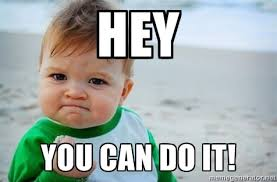

In [2]:
Image('static/baby.jpeg')

In [8]:
df.head(1)

,Jahr,Geschlecht,Altersgruppe,Rang des Vornamen,Vorname,Hilfsmerkmal: Anzahl Name insgesamt,Anzahl Personen
0,2016,weiblich,50 bis unter 60 Jahre,2.Vorname,Maria,6099,974
